# Assessing Model Performance in Supervised Learning with scikit-learn

---

## 1. Introduction: How Good is Your Model?

- In supervised learning, especially classification, evaluating your model is crucial.
- **Accuracy** (the fraction of correctly classified samples) is a basic metric, but can be misleading in many real-world situations.

---

## 2. Classification Metrics: Why Accuracy Can Be Misleading

- **Accuracy** measures:  
  $$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
- Example: **Fraud Detection**
    - **Scenario:** Only 1% of bank transactions are fraudulent.
    - A naive model could label every transaction as *legitimate* and still achieve **99% accuracy**!
        - **Problem:** This model never catches fraud, failing its intended purpose.

---

## 3. Class Imbalance

- **Class Imbalance:** When one class occurs much more frequently than another.
    - E.g., In fraud detection: 99% legitimate, 1% fraudulent.
- **Why is this a problem?**
    - A high accuracy model could completely miss the minority class (fraud).
    - **Accuracy** does not reveal if the model is catching the critical cases (fraudulent transactions).

---

## 4. The Confusion Matrix

- **A confusion matrix** is a 2x2 table (for binary classification) that shows:
    - **Actual vs. Predicted** labels.
- **Structure:**
```
      |                    | Predicted: Legitimate | Predicted: Fraduluent|
      |--------------------|-----------------------|----------------------|
      | Actual: Legitimate | True Negative (TN)    | False Positive (FP)  |
      | Actual: Fraduluent | False Negative (FN)   | True Positive (TP)   |
```
- **Definitions:**
    - **True Positive (TP):** Fraudulent transactions correctly labeled as fraud.
    - **True Negative (TN):** Legitimate transactions correctly labeled as legitimate.
    - **False Positive (FP):** Legitimate transactions incorrectly labeled as fraud.
    - **False Negative (FN):** Fraudulent transactions incorrectly labeled as legitimate.

#### Why is the confusion matrix important?
- Lets you see **types of errors** your model is making.
- From it, you can compute several useful metrics, not just accuracy.

---

## 5. Key Classification Metrics

### **a. Accuracy**
- $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
- Fraction of all predictions that are correct.

### **b. Precision**
- $$\text{Precision} = \frac{TP}{TP + FP}$$
- Measures: Of all predicted positives, how many were actually positive?
    - **High precision** = Few false positives (legitimate labeled as fraud).

### **c. Recall (Sensitivity)**
- $$\text{Recall} = \frac{TP}{TP + FN}$$
- Measures: Of all actual positives, how many did we catch?
    - **High recall** = Few false negatives (frauds missed).

### **d. F1 Score**
- $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
- Harmonic mean of precision and recall.
- **Why use it?**  
  Balances the trade-off between precision and recall, especially useful with class imbalance.

---

## 6. Confusion Matrix and Metrics in scikit-learn

Let's see how to compute all of this in Python using **scikit-learn**.

### **Example Code: Building and Evaluating a Classifier**

```python
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assume X (features) and y (labels) are already defined

# 1. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 2. Instantiate KNN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# 3. Fit classifier to training data
knn.fit(X_train, y_train)

# 4. Predict labels for test set
y_pred = knn.predict(X_test)
```

#### **Code Explanation (line-by-line):**

- `from sklearn.metrics import classification_report, confusion_matrix`  
    - **Imports** functions to compute classification metrics and the confusion matrix.
- `from sklearn.neighbors import KNeighborsClassifier`  
    - **Imports** the K-Nearest Neighbors classifier.
- `from sklearn.model_selection import train_test_split`  
    - **Imports** the function to split data into train/test sets.
- `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)`
    - **Splits** the data into training and test sets (40% test).
    - **Purpose:** To evaluate the model on unseen data.
- `knn = KNeighborsClassifier(n_neighbors=7)`
    - **Creates** a KNN classifier with 7 neighbors.
- `knn.fit(X_train, y_train)`
    - **Trains** the classifier on the training data.
- `y_pred = knn.predict(X_test)`
    - **Predicts** labels for the test set.

---

### **Confusion Matrix Output**

```python
print(confusion_matrix(y_test, y_pred))
```

#### **Output:**
```
[[1106   11]
 [ 183   34]]
```

#### **Explanation:**

- **Rows:** True (actual) labels
- **Columns:** Predicted labels

|                 | Predicted: 0 | Predicted: 1 |
|-----------------|--------------|--------------|
| Actual: 0 (TN)  |    1106      |     11       |
| Actual: 1 (FN/TP)|   183       |     34       |

- **1106**: True Negatives (legitimate correctly predicted)
- **11**: False Positives (legitimate wrongly predicted as fraud)
- **183**: False Negatives (fraud missed, predicted as legitimate)
- **34**: True Positives (fraud correctly predicted)

**Significance:**
- The model is much better at identifying legitimate transactions than fraudulent ones.
- High number of false negatives (missed frauds) is a problem.

---

### **Classification Report Output**

```python
print(classification_report(y_test, y_pred))
```

#### **Output:**

```
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1117
           1       0.76      0.16      0.26       217

    accuracy                           0.85      1334
   macro avg       0.81      0.57      0.59      1334
weighted avg       0.84      0.85      0.81      1334
```

#### **Explanation:**

- **precision**: For each class, what proportion of predicted labels are correct?
- **recall**: For each class, what proportion of true labels were captured?
- **f1-score**: Harmonic mean of precision and recall.
- **support**: Number of true instances for each class.

##### **By class:**
- **Class 0 (legitimate):**
    - Precision: 0.86 (most predicted legitimate are really legitimate)
    - Recall: 0.99 (almost all legitimate are captured)
    - F1-score: 0.92 (high overall performance)
- **Class 1 (fraudulent):**
    - Precision: 0.76 (if model says fraud, 76% chance it's correct)
    - Recall: 0.16 (only 16% of actual frauds are detected!)
    - F1-score: 0.26 (very low overall performance for this class)

##### **Overall:**
- **Accuracy:** 0.85 (85% of total predictions correct)
    - But recall for fraudulent class is very low, so the model fails in its main purpose.

##### **Macro avg:** Arithmetic mean across classes (treats all classes equally).
##### **Weighted avg:** Weighted by support (useful when class imbalance exists).

**Significance:**
- **Low recall** for the minority class (fraud): the model misses most fraud cases.
- The model is not suitable for tasks where catching fraud is critical.

---

## 7. Summary: Key Takeaways

- **Accuracy** alone is not enough, especially with class imbalance.
- Use the **confusion matrix** to understand prediction errors.
- Compute **precision, recall, and F1 score** to get a more complete picture.
- Use `classification_report` in scikit-learn for a detailed metric summary.
- Always consider **the business or practical impact**: catching fraud (recall) may be more important than overall accuracy.

---



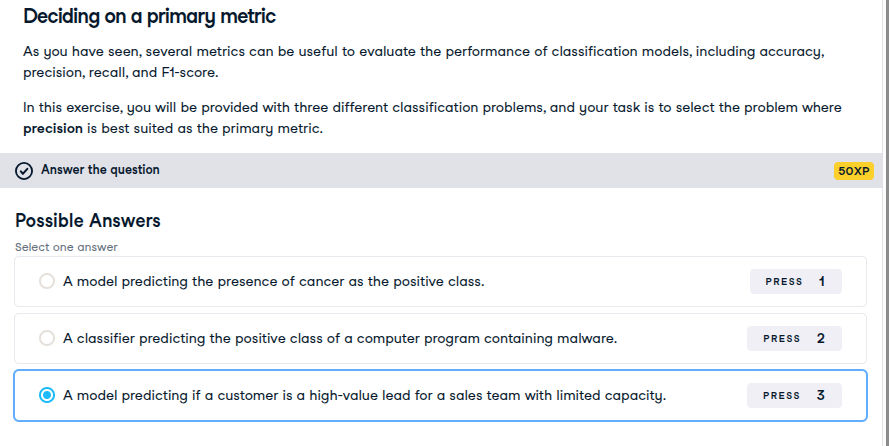

### Exercise
Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

Instructions

Import confusion_matrix and classification_report.
Fit the model to the training data.
Predict the labels of the test set, storing the results as y_pred.
Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.
```python
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<script.py> output:
    [[116  35]
     [ 46  34]]
                  precision    recall  f1-score   support
    
               0       0.72      0.77      0.74       151
               1       0.49      0.42      0.46        80
    
        accuracy                           0.65       231
       macro avg       0.60      0.60      0.60       231
    weighted avg       0.64      0.65      0.64       231
    

```

# Logistic Regression and the ROC Curve

---

## 1. Introduction: Logistic Regression and the ROC Curve

- **Logistic Regression** is a fundamental model for binary classification tasks.
- Despite the name, it is used for **classification**, not regression.

---

## 2. Logistic Regression for Binary Classification

- **Purpose:** Estimate the probability \( p \) that an observation belongs to the positive class (e.g., has diabetes or will churn).
- **Threshold Rule:**  
    - If \( p > 0.5 \): Predict class `1` (positive class)
    - If \( p < 0.5 \): Predict class `0` (negative class)
- **Example:**  
    - For diabetes:  
        - \( p > 0.5 \) → Predict "has diabetes"
        - \( p < 0.5 \) → Predict "does not have diabetes"

---

## 3. Linear Decision Boundary

- **Logistic Regression** produces a **linear decision boundary** in the feature space.
    - This means it separates the classes using a straight line (or hyperplane in higher dimensions).

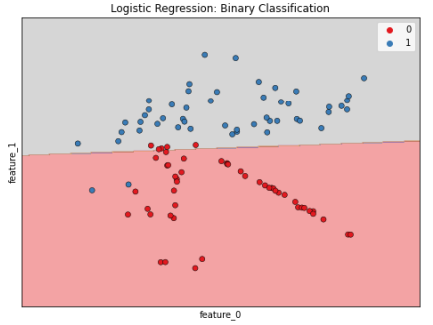

---

## 4. Logistic Regression in scikit-learn

- The workflow is similar to other scikit-learn classifiers:
    1. **Import** the model.
    2. **Instantiate** the classifier.
    3. **Split** the data into train/test sets.
    4. **Fit** the model.
    5. **Predict** labels.

### Example Code

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume X (features) and y (labels) are already defined

# 1. Instantiate the classifier
logreg = LogisticRegression()

# 2. Split the data into training and test sets (30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Fit the model to the training data
logreg.fit(X_train, y_train)

# 4. Predict the labels for the test set
y_pred = logreg.predict(X_test)
```

#### Line-by-line Explanation:

- `from sklearn.linear_model import LogisticRegression`  
    - **Imports** the logistic regression classifier.
- `from sklearn.model_selection import train_test_split`  
    - **Imports** function to split data into training and test sets.
- `logreg = LogisticRegression()`  
    - **Creates** a LogisticRegression object.
- `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`  
    - **Splits** the data into 70% train, 30% test; `random_state=42` for reproducibility.
- `logreg.fit(X_train, y_train)`  
    - **Fits** the model to the training data.
- `y_pred = logreg.predict(X_test)`  
    - **Predicts** class labels for test data.

---

## 5. Predicting Probabilities

- **Logistic regression** can predict class probabilities using the `.predict_proba()` method.

### Example Code

```python
# Predict probabilities for the test set
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Show the predicted probability for the first test observation
print(y_pred_probs[0])
```

#### Example Output

```
0.08961376
```

#### Explanation:

- `logreg.predict_proba(X_test)`  
    - Returns a 2D array: probabilities for class 0 (negative) and class 1 (positive) for each sample.
- `[:, 1]`  
    - Selects the probability of the **positive class** (class 1).
- `y_pred_probs[0]`  
    - Shows the probability that the first observation belongs to the positive class (e.g., has churned).
- In this example, the probability is about **0.09** (9%).

**Significance:**  
- Probabilities allow us to adjust the threshold and analyze model performance at different operating points.

---

## 6. Probability Thresholds

- **Default Threshold:** 0.5  
    - If probability > 0.5 → predict class 1.
    - If probability < 0.5 → predict class 0.
- **Not specific to logistic regression:**  
    - Many classifiers with probability outputs (e.g., KNN) use thresholds.

**Key Question:**  
- What happens if we change the threshold?

---

## 7. The ROC Curve

- **ROC (Receiver Operating Characteristic) Curve** visualizes the trade-off between:

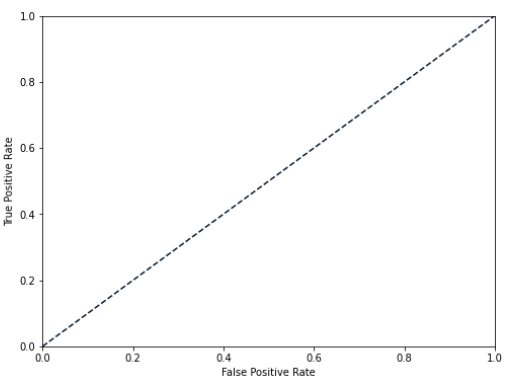

- **True Positive Rate (TPR)** = Recall = Sensitivity
- **False Positive Rate (FPR)**
- Here, the dotted line represents a chance model, which randomly guesses labels.

- **What does the ROC Curve show?**
    - How TPR and FPR change as we vary the probability threshold.
    - **Diagonal line:** Represents a random guesser.
    - **Curve above the diagonal:** Model is better than random.

- **Threshold extremes:**
    - **Threshold = 0:** Predicts all as positive (TPR = 1, FPR = 1)

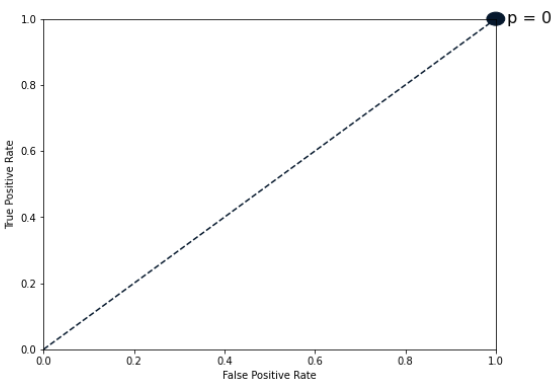

- **Threshold = 1:** Predicts all as negative (TPR = 0, FPR = 0)

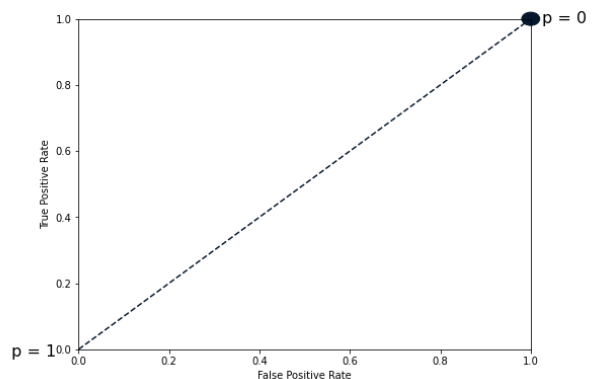

**Vary the threshold, we get a series of different false positive and true positive rates.**
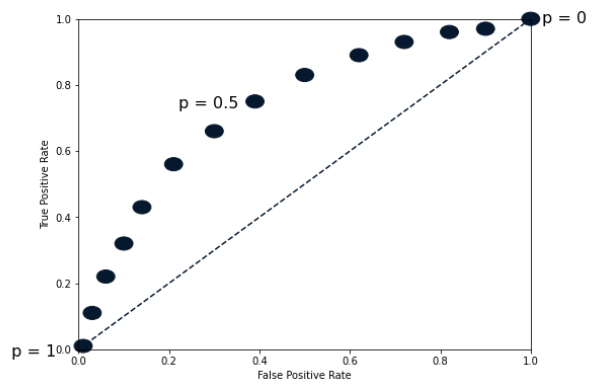

**A line plot of the thresholds helps to visualize the trend.**
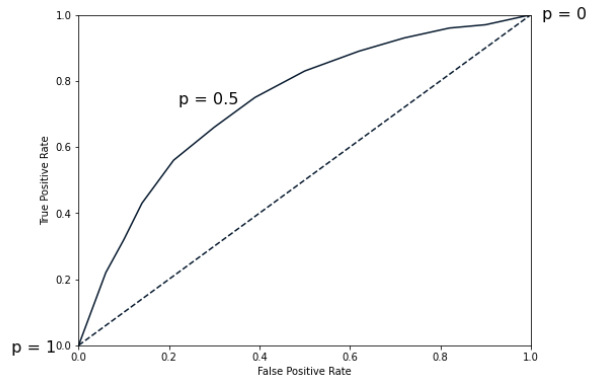

---

## 8. Plotting the ROC Curve in scikit-learn

### Example Code

```python
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
```
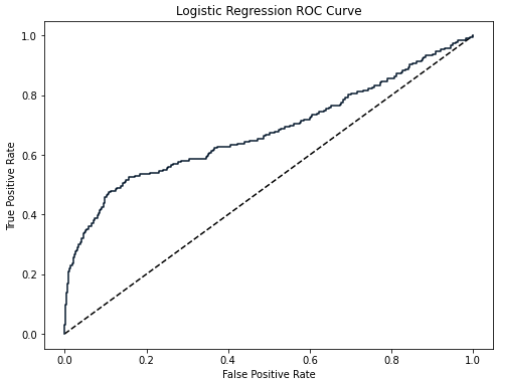

#### Output

*A plot will appear with:*
- X-axis: False Positive Rate (FPR)
- Y-axis: True Positive Rate (TPR)
- Curve: The model's performance across thresholds
- Dashed line: Random guessing baseline

#### Line-by-line Explanation:

- `from sklearn.metrics import roc_curve`  
    - **Imports** function to compute ROC curve metrics.
- `import matplotlib.pyplot as plt`  
    - **Imports** plotting library.
- `fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)`  
    - **Calculates** arrays of FPR, TPR, and thresholds for the ROC curve using true labels and predicted probabilities.
- `plt.plot([0, 1], [0, 1], 'k--')`  
    - **Plots** the diagonal reference line (random classifier).
- `plt.plot(fpr, tpr)`  
    - **Plots** the model's ROC curve.
- `plt.xlabel('False Positive Rate')`, `plt.ylabel('True Positive Rate')`, `plt.title('Logistic Regression ROC Curve')`  
    - **Labels** the axes and the plot.
- `plt.show()`  
    - **Displays** the plot.

**Significance:**  
- The closer the ROC curve is to the top-left corner, the better the model.

---

## 9. ROC AUC (Area Under the Curve)

- **ROC AUC** quantifies the overall ability of the model to discriminate between the classes.
    - **Range:** 0 (worst) to 1 (perfect)
    - **0.5:** Equivalent to random guessing
    - **Higher is better**

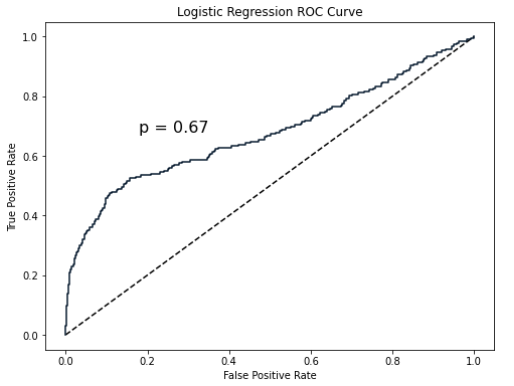

**Here, the model scores point-six-seven, which is only 34% better than a model making random guesses.**

---

## 10. Calculating ROC AUC in scikit-learn

### Example Code

```python
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
print(roc_auc_score(y_test, y_pred_probs))
```

#### Example Output

```
0.6700964152663693
```

#### Line-by-line Explanation:

- `from sklearn.metrics import roc_auc_score`  
    - **Imports** function to compute ROC AUC.
- `roc_auc_score(y_test, y_pred_probs)`  
    - **Calculates** the area under the ROC curve using true labels and predicted probabilities.
- `print(...)`  
    - **Displays** the ROC AUC score.

**Significance:**  
- **AUC = 0.67** means the model is 67% likely to rank a randomly chosen positive instance higher than a randomly chosen negative one—only 17% better than random guessing.

---

## 11. Summary and Key Takeaways

- **Logistic regression** is a classification algorithm that outputs probabilities and uses a linear decision boundary.
- The **default threshold** is 0.5, but this can be varied.
- **ROC curves** visualize the trade-off between true positive and false positive rates at various thresholds.
- **ROC AUC** is a single-value metric summarizing model performance across all thresholds.
- **scikit-learn** provides easy-to-use tools for fitting logistic regression, predicting probabilities, plotting ROC curves, and calculating AUC.

---


### Exercise
Building a logistic regression model
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

Instructions

Import LogisticRegression.
Instantiate a logistic regression model, logreg.
Fit the model to the training data.
Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.
```python
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

<script.py> output:
    [0.26551024 0.18336603 0.12119636 0.15613537 0.49611218 0.44582207
     0.01359244 0.61646104 0.55640536 0.79311811]
In [1]:

```


### Exercise
The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

Instructions 1/2

Import roc_curve.
Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
Plot true positive rate against false positive rate.
```python
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()
```
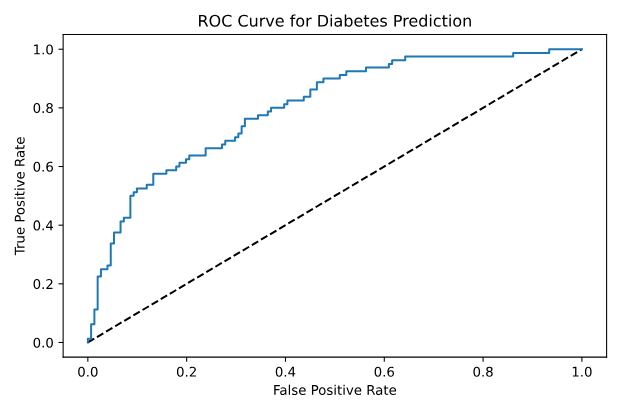

Question
Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?

Possible answersc


The model is about as good as randomly guessing the class of each observation.

The model is much worse than randomly guessing the class of each observation.

The model is much better than randomly guessing the class of each observation.

It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.


### Exercise
ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

Instructions

Import roc_auc_score.
Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
Calculate and print the confusion matrix.
Call classification_report().
```python
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

<script.py> output:
    0.8002483443708608
    [[121  30]
     [ 30  50]]
                  precision    recall  f1-score   support
    
               0       0.80      0.80      0.80       151
               1       0.62      0.62      0.62        80
    
        accuracy                           0.74       231
       macro avg       0.71      0.71      0.71       231
    weighted avg       0.74      0.74      0.74       231
    
```

# Hyperparameter Tuning in scikit-learn

---

## 1. Introduction: What is Hyperparameter Tuning?

- **Hyperparameters** are parameters we set *before* fitting a model.
    - Examples:
        - **Ridge/Lasso Regression**: `alpha` (regularization strength)
        - **KNN**: `n_neighbors` (number of neighbors)
- Choosing the right hyperparameters is **essential** for model performance.

---

## 2. Why Hyperparameter Tuning?

- **Goal:** Find the best combination of hyperparameters for your model.
- **Process:**
    1. Try multiple hyperparameter values.
    2. Fit the model with each combination.
    3. Evaluate performance for each.
    4. Choose the best combination.
- This process is called **hyperparameter tuning**.

**Important:**  
- Always use **cross-validation** to evaluate hyperparameters on the **training set**, not the test set.
- Withhold the test set for final evaluation only.

---

## 3. Grid Search Cross-Validation

- **Grid Search:** Try every combination of specified hyperparameter values.
- Example (for KNN):
    - Try different `n_neighbors` (e.g., 2, 5, 8, 11)
    - Try different `metric` types (e.g., 'euclidean', 'manhattan')
    - Evaluate every pair of options.

- **Cross-Validation:**  
    - For each combination, perform k-fold cross-validation.
    - Calculate the mean score for each combination.

- **Best Hyperparameters:**  
    - Choose the combination with the highest mean cross-validation score.

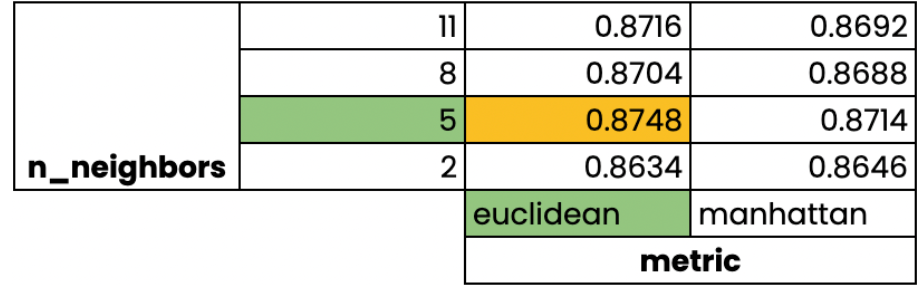

---

## 4. GridSearchCV in scikit-learn

### Example Code

```python
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
import numpy as np

# Assume X_train, y_train are already defined

# 1. Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Define hyperparameter grid
param_grid = {
    "alpha": np.arange(0.0001, 1, 10),  # Example: array([0.0001])
    "solver": ["sag", "lsqr"]
}

# 3. Instantiate the model
ridge = Ridge()

# 4. Set up grid search
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# 5. Fit grid search to training data
ridge_cv.fit(X_train, y_train)

# 6. Print best hyperparameters and corresponding score
print(ridge_cv.best_params_, ridge_cv.best_score_)
```

### Example Output

```
{'alpha': 0.0001, 'solver': 'sag'} 0.7529912278705785
```

### Line-by-Line Explanation

- `from sklearn.model_selection import GridSearchCV, KFold`  
    - **Imports** GridSearchCV for grid search and KFold for k-fold cross-validation.
- `from sklearn.linear_model import Ridge`  
    - **Imports** Ridge regression model.
- `import numpy as np`  
    - **Imports** NumPy for numerical operations (creating hyperparameter grid).
- `kf = KFold(n_splits=5, shuffle=True, random_state=42)`  
    - **Creates** a 5-fold cross-validator with shuffling and reproducible splits.
- `param_grid = { ... }`  
    - **Specifies** which hyperparameters to search and their possible values.
- `ridge = Ridge()`  
    - **Creates** an instance of Ridge regression.
- `ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)`  
    - **Wraps** the Ridge model in a grid search object using the specified grid and cross-validation scheme.
- `ridge_cv.fit(X_train, y_train)`  
    - **Fits** the grid search: tries all hyperparameter combinations, evaluates via cross-validation.
- `print(ridge_cv.best_params_, ridge_cv.best_score_)`  
    - **Outputs** the best hyperparameter combination and its mean cross-validation score.

### Output Significance

- `{'alpha': 0.0001, 'solver': 'sag'}`:  
    - **Best hyperparameters** for the model, found by grid search.
- `0.7529912278705785`:  
    - **Highest mean cross-validation score** achieved with these parameters.

---

## 5. Limitations of Grid Search

- **Combinatorial Explosion:**  
    - Number of model fits = (# hyperparameter values) × (# folds)
    - Example:  
        - 3-fold CV × 1 hyperparameter × 10 values = **30 fits**
        - 10-fold CV × 3 hyperparameters × 10 values each = **900 fits**
- **Conclusion:**  
    - Grid search can become computationally expensive with many parameters or values.

---

## 6. RandomizedSearchCV: A Faster Alternative

- **Randomized Search:**  
    - Instead of exhaustively searching all combinations, randomly select a fixed number (`n_iter`) of combinations.
    - Great for large search spaces.

### Example Code

```python
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge
import numpy as np

# Assume X_train, y_train are already defined

# 1. Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Define hyperparameter grid
param_grid = {
    "alpha": np.arange(0.0001, 1, 10),  # Example: array([0.0001])
    "solver": ["sag", "lsqr"]
}

# 3. Instantiate the model
ridge = Ridge()

# 4. Set up randomized search (test 2 random combinations)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)

# 5. Fit randomized search to training data
ridge_cv.fit(X_train, y_train)

# 6. Print best hyperparameters and corresponding score
print(ridge_cv.best_params_, ridge_cv.best_score_)
```

### Example Output

```
{'solver': 'sag', 'alpha': 0.0001} 0.7529912278705785
```

### Line-by-Line Explanation

- `from sklearn.model_selection import RandomizedSearchCV, KFold`  
    - **Imports** RandomizedSearchCV and KFold cross-validation splitter.
- `from sklearn.linear_model import Ridge`  
    - **Imports** Ridge regression model.
- `import numpy as np`  
    - **Imports** NumPy for grid creation.
- `kf = KFold(n_splits=5, shuffle=True, random_state=42)`  
    - **Creates** a 5-fold cross-validator.
- `param_grid = { ... }`  
    - **Defines** the range of hyperparameters to randomly sample from.
- `ridge = Ridge()`  
    - **Instantiates** Ridge regression.
- `ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)`  
    - **Creates** a randomized search object, testing only 2 random combinations.
- `ridge_cv.fit(X_train, y_train)`  
    - **Performs** cross-validated randomized search.
- `print(ridge_cv.best_params_, ridge_cv.best_score_)`  
    - **Displays** the best hyperparameters and their mean cross-validation score.

### Output Significance

- Randomized search found the same best hyperparameters as grid search, but with fewer total model fits.
- **Faster** when many hyperparameters or values are possible.

---

## 7. Evaluating on the Test Set

- After hyperparameter tuning (on training data), evaluate your model on the **withheld test set** for a realistic performance estimate.

### Example Code

```python
# Evaluate the tuned model on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)
```

### Example Output

```
0.7564731534089224
```

### Line-by-Line Explanation

- `test_score = ridge_cv.score(X_test, y_test)`  
    - **Calculates** the model's score (e.g., R^2 for regression) on the test set using the best-found parameters.
- `print(test_score)`  
    - **Outputs** the final test score.

### Output Significance

- Final test score is **0.756**, slightly better than the cross-validation score.
- This is the **true measure** of model performance on unseen data.

---

## 8. Summary & Key Takeaways

- **Hyperparameter tuning** is crucial for optimal model performance.
- Use **cross-validation** on the training set when searching for hyperparameters.
- **GridSearchCV**: Systematically evaluates all combinations (can be slow for large grids).
- **RandomizedSearchCV**: Samples random combinations (faster for large spaces).
- **Final test set** should only be used once, after all tuning is complete, to assess generalization.

---


### Exercise
Hyperparameter tuning with GridSearchCV
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

Instructions

Import GridSearchCV.
Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
Fit the grid search object to the training data to perform a cross-validated grid search.
```python
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(1e-05, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

<script.py> output:
    Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
    Tuned lasso score: 0.3307880723812198

```


### Exercise
Hyperparameter tuning with RandomizedSearchCV
As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

Instructions

Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
Fit logreg_cv to the training data.
Print the model's best parameters and accuracy score.
```python
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

<script.py> output:
    Tuned Logistic Regression Parameters: {'tol': np.float64(0.6530959183673469), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.41224489795918373)}
    Tuned Logistic Regression Best Accuracy Score: 0.6498733839797415
```


In [ ]:
# Chap #03 End...